# Iherb dataset review

## Table of Contents

[1. Data cleaning](#Import)<br>
&emsp;&emsp;[1.1 Title translations](#Title)<br>
[2. Descriptive Statistics](#Descriptive)<br>
[3. Data exploration](#Dataexplore)<br>
&emsp;&emsp;[3.1 Wordcloud](#wordcloud)<br>
[4. Sentiment Analysis](#Sentiment)<br>
&emsp;&emsp;[4.1 Tokenization](#Token)<br>
&emsp;&emsp;[4.2 VADER](#VADER)<br>
&emsp;&emsp;[4.3 Multinomial NB](#Multinomial_NB)<br>
&emsp;&emsp;[4.4 Harvard IV-4 Dictionary](#Harvard)<br>
&emsp;&emsp;[4.5 Loughran and McDonald Dictionary](#Maccy)<br>
[5. Notes](#Notes)<br>

In [1]:
import requests
import time
from bs4 import BeautifulSoup
import pandas as pd
import csv
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
import glob

In [2]:
products_df = pd.read_csv('products.tsv',sep='\t')
reviews_df = pd.read_csv('reviews.tsv',sep='\t')

In [3]:
reviews_df.head()

,abuseCount,customerNickname,helpfulNo,helpfulYes,id,imagesCount,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,ratingValue,reviewText,reviewTitle,reviewed,score,languageCode.1,translation.reviewText,translation.reviewTitle
0,0,iHerb Customer,0,6,05c2b17e-c28d-4792-930d-27e787d8d4ad,1,en-US,2021-01-27T09:04:10.569Z,103839,0.0,34.0,50,The mask quality and the color is good. It fit...,Dotted Pattern Is Nice,True,1.614071e+09,en-US,NaN,NaN
1,0,iHerb Customer,0,0,80e44af8-2edf-4b81-a80a-7e7888d03cc0,0,ru-RU,2021-02-07T00:56:39.055Z,103839,0.0,37.0,50,Внуку очень понравилось. Удобная маска.,Прекрасно!,False,1.612659e+09,ru-RU,The grandson really liked it. Comfortable mask.,en-US
2,0,iHerb Customer,0,0,9a76e047-21e4-4da3-8b50-9d2396519b6b,0,en-US,2021-02-06T21:40:02.886Z,103839,0.0,3.0,40,Easy to put on & comfortable to wear.,Good,False,1.612648e+09,en-US,NaN,NaN
3,0,InnaIgorevna,0,0,2890ac54-8707-418e-be3e-8d46231e3672,0,ru-RU,2021-02-05T16:29:28.906Z,103839,0.0,16.0,40,"Тонкая, приятная к телу маска. Расцветка тоже ...",Хорошо,False,1.612543e+09,ru-RU,A thin mask that is pleasant to the body. I li...,en-US
4,0,iHerb Customer,0,0,9db33354-0457-4efa-bc9c-b5f7ee0eff31,0,ru-RU,2021-02-05T09:43:42.367Z,103839,0.0,19.0,50,Отличная маска! Мне подошла идеально. Слегка е...,Прекрасно!,False,1.612518e+09,ru-RU,Great mask! It suited me perfectly. There is a...,en-US


In [4]:
# Data Exploration

print("There are {} observations and {} features in the 'review' dataset. \n".format(reviews_df.shape[0],reviews_df.shape[1]))

print("There are {} types of mask products in the 'product' dataset".format(len(products_df)))


There are 3849 observations and 19 features in the 'review' dataset. 

There are 27 types of mask products in the 'product' dataset


In [61]:
# Importing the necessary libraries
#!pip install textblob 
from textblob import TextBlob
import nltk
#nltk.download('punkt')

In [6]:
print(type(reviews_df['translation.reviewText']))

<class 'pandas.core.series.Series'>


<a id='Import'></a>
# Data cleaning

In [7]:
reviews_df['reviewText'] = reviews_df['reviewText'].str.strip()
reviews_df = reviews_df[reviews_df.reviewText != '']
reviews_df.head()

,abuseCount,customerNickname,helpfulNo,helpfulYes,id,imagesCount,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,ratingValue,reviewText,reviewTitle,reviewed,score,languageCode.1,translation.reviewText,translation.reviewTitle
0,0,iHerb Customer,0,6,05c2b17e-c28d-4792-930d-27e787d8d4ad,1,en-US,2021-01-27T09:04:10.569Z,103839,0.0,34.0,50,The mask quality and the color is good. It fit...,Dotted Pattern Is Nice,True,1.614071e+09,en-US,NaN,NaN
1,0,iHerb Customer,0,0,80e44af8-2edf-4b81-a80a-7e7888d03cc0,0,ru-RU,2021-02-07T00:56:39.055Z,103839,0.0,37.0,50,Внуку очень понравилось. Удобная маска.,Прекрасно!,False,1.612659e+09,ru-RU,The grandson really liked it. Comfortable mask.,en-US
2,0,iHerb Customer,0,0,9a76e047-21e4-4da3-8b50-9d2396519b6b,0,en-US,2021-02-06T21:40:02.886Z,103839,0.0,3.0,40,Easy to put on & comfortable to wear.,Good,False,1.612648e+09,en-US,NaN,NaN
3,0,InnaIgorevna,0,0,2890ac54-8707-418e-be3e-8d46231e3672,0,ru-RU,2021-02-05T16:29:28.906Z,103839,0.0,16.0,40,"Тонкая, приятная к телу маска. Расцветка тоже ...",Хорошо,False,1.612543e+09,ru-RU,A thin mask that is pleasant to the body. I li...,en-US
4,0,iHerb Customer,0,0,9db33354-0457-4efa-bc9c-b5f7ee0eff31,0,ru-RU,2021-02-05T09:43:42.367Z,103839,0.0,19.0,50,Отличная маска! Мне подошла идеально. Слегка е...,Прекрасно!,False,1.612518e+09,ru-RU,Great mask! It suited me perfectly. There is a...,en-US


In [8]:
reviewed_df = reviews_df.rename(columns={"translation.reviewText": "translated_review_text", "translation.reviewTitle": "translated_review_title"})
reviewed_df
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

,abuseCount,customerNickname,helpfulNo,helpfulYes,id,imagesCount,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,ratingValue,reviewText,reviewTitle,reviewed,score,languageCode.1,translated_review_text,translated_review_title
0,0,iHerb Customer,0,6,05c2b17e-c28d-4792-930d-27e787d8d4ad,1,en-US,2021-01-27T09:04:10.569Z,103839,0.0,34.0,50,The mask quality and the color is good. It fit...,Dotted Pattern Is Nice,True,1.614071e+09,en-US,NaN,NaN
1,0,iHerb Customer,0,0,80e44af8-2edf-4b81-a80a-7e7888d03cc0,0,ru-RU,2021-02-07T00:56:39.055Z,103839,0.0,37.0,50,Внуку очень понравилось. Удобная маска.,Прекрасно!,False,1.612659e+09,ru-RU,The grandson really liked it. Comfortable mask.,en-US
2,0,iHerb Customer,0,0,9a76e047-21e4-4da3-8b50-9d2396519b6b,0,en-US,2021-02-06T21:40:02.886Z,103839,0.0,3.0,40,Easy to put on & comfortable to wear.,Good,False,1.612648e+09,en-US,NaN,NaN
3,0,InnaIgorevna,0,0,2890ac54-8707-418e-be3e-8d46231e3672,0,ru-RU,2021-02-05T16:29:28.906Z,103839,0.0,16.0,40,"Тонкая, приятная к телу маска. Расцветка тоже ...",Хорошо,False,1.612543e+09,ru-RU,A thin mask that is pleasant to the body. I li...,en-US
4,0,iHerb Customer,0,0,9db33354-0457-4efa-bc9c-b5f7ee0eff31,0,ru-RU,2021-02-05T09:43:42.367Z,103839,0.0,19.0,50,Отличная маска! Мне подошла идеально. Слегка е...,Прекрасно!,False,1.612518e+09,ru-RU,Great mask! It suited me perfectly. There is a...,en-US
5,0,iHerb Customer,0,0,5fab014c-d839-4743-a343-cf03b7b168ce,0,en-US,2021-02-02T12:28:22.584Z,103839,7.0,258.0,50,a little bigger for a small face..for me it is...,Großartig!,False,1.612269e+09,en-US,NaN,NaN
6,0,iHerb Customer,0,0,7eb008a6-195b-437b-8f08-482d171c2648,0,ru-RU,2021-02-02T12:23:53.355Z,103839,0.0,5.0,50,"Приятная ткань, удобно облегает лицо, не мешае...",Удобная маска,False,1.612269e+09,ru-RU,"Nice fabric, fits the face comfortably, does n...",en-US
7,0,iHerb Customer,0,0,90e02dad-fcf3-4c40-b21c-6e7b12168ee6,0,en-US,2021-02-01T20:59:59.034Z,103839,1.0,62.0,50,The Copper fibers in the fabric not only offer...,Excellent!,False,1.612213e+09,en-US,NaN,NaN
8,0,Maxchen,0,1,7f2ed8ab-1f84-46ca-af30-9e4444b7ecaf,0,ru-RU,2021-01-27T05:38:56.182Z,103839,41.0,119.0,50,"Хорошая маска, удобная, хорошо поступает возду...",Excellent!,False,1.612115e+09,ru-RU,"Good mask, comfortable, good air flow. There a...",en-US
9,0,iHerb Customer,0,0,72c1f16a-9c93-4b8a-961d-8ee4487c5c72,0,en-US,2021-01-27T08:43:35.293Z,103839,0.0,133.0,50,will buy again!,Excellent! very comfortable and pretty,False,1.611737e+09,en-US,NaN,NaN


In [9]:
reviewed_df.translated_review_text.fillna(reviewed_df.reviewText, inplace = True)

In [10]:
reviewed_df.translated_review_title.fillna(reviewed_df.reviewTitle,inplace = True)
# reviewed_df

<a id='Title'></a>
## Translations for the titles

In [11]:
lang_df = reviewed_df["languageCode"].value_counts().to_frame()
lang_df["cumsum"] = lang_df["languageCode"].cumsum().div(3845).round(2)
lang_df

,languageCode,cumsum
en-US,1851,0.48
ru-RU,1300,0.82
ar-SA,227,0.88
he-IL,167,0.92
ja-JP,121,0.95
fr-FR,102,0.98
ko-KR,19,0.98
zh-TW,19,0.99
es-MX,14,0.99
de-DE,11,1.00


In [12]:
languages = lang_df.index.tolist()
languages = [lang.split("-")[0] for lang in languages]
languages = languages[:6]

In [13]:
import random
#!pip install google_trans_new
from google_trans_new import google_translator  
translator = google_translator()
random_seconds = random.randint(0, 3)
time.sleep(random_seconds)


translated_review_title = []

for i, row in reviewed_df.iterrows():
    lang = row['languageCode'].split("-")[0]
    title = row["reviewTitle"]
    
    if i % 100 == 500:
        print(i)
    if lang == "en":
        translated_review_title.append(title)
        continue
        
    trans_title = translator.translate(title, lang_tgt='en', lang_src=lang)
    translated_review_title.append(trans_title)
    
reviewed_df["translatedTitle"] = translated_review_title

google_new_transError: 429 (Too Many Requests) from TTS API. Probable cause: Unknown

In [14]:
len(translated_review_title)

1

In [ ]:
#review titles are not properly translated. Using googletrans will not work as they only deal with 1 language output at a time.

<a id='Descriptive'></a>
# Descriptive Statistics

In [16]:
average = reviewed_df['ratingValue'].mean()
print(average)

med = reviewed_df['ratingValue'].median()
print(med)

standard_deviation = reviewed_df['ratingValue'].std()
print(standard_deviation)

44.481144343302994
50.0
9.862344469769518


In [17]:
reviewed_df.ratingValue.dtype

dtype('int64')

In [18]:
#Review ratings 
ratings = reviewed_df['ratingValue'].value_counts()
ratings

50    2623
40     691
30     287
10     125
20     119
Name: ratingValue, dtype: int64

 - Most products were overwhelmingly positive, which is also reflected in the wordcloud generated (see below)

In [19]:
reviewed_df['ratingValue'] = reviewed_df['ratingValue'].div(10)

In [20]:
reviewed_df['ratingValue'] = reviewed_df['ratingValue'].astype("int")

In [62]:
#ratings.plot(kind='bar')

In [22]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# %matplotlib inline

# sns.set(style="whitegrid")
# plt.figure(figsize=(10,8))
# ax = sns.boxplot(x='ratingValue', data=reviews_df, orient="h")

<a id='Dataexplore'></a>
# Data exploration

In [23]:
reviewed_df.head(1)

,abuseCount,customerNickname,helpfulNo,helpfulYes,id,imagesCount,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,ratingValue,reviewText,reviewTitle,reviewed,score,languageCode.1,translated_review_text,translated_review_title
0,0,iHerb Customer,0,6,05c2b17e-c28d-4792-930d-27e787d8d4ad,1,en-US,2021-01-27T09:04:10.569Z,103839,0.0,34.0,5,The mask quality and the color is good. It fit...,Dotted Pattern Is Nice,True,1.614071e+09,en-US,The mask quality and the color is good. It fit...,Dotted Pattern Is Nice


In [24]:
# reviewed_df["helpfulYes"].value_counts()

In [25]:
# reviewed_df[reviewed_df['helpfulYes'] > 1]

- I considered grouping each product based on the number of helpful reviews it garnered, but I did not pursue that as it does not reveal which products are actually liked, and which products were not. 

<a id='wordcloud'></a>
## Wordcloud

In [63]:
#!pip install wordcloud

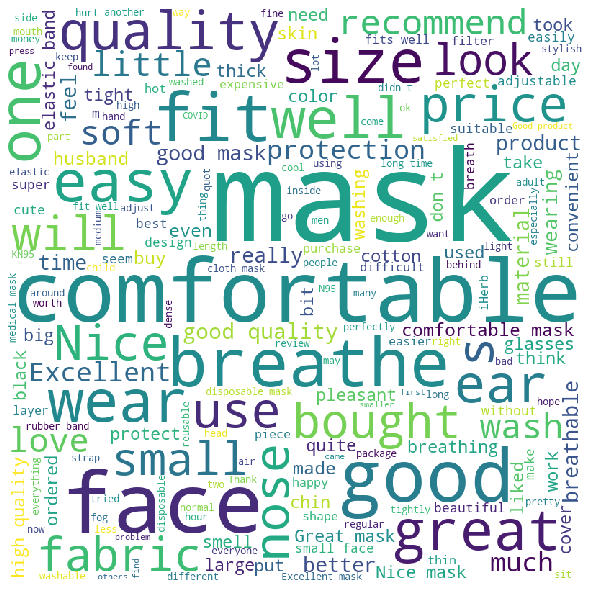

In [27]:
#Final word cloud after all the cleaning and pre-processing

from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            min_font_size = 10).generate(' '.join(reviewed_df['translated_review_text']))

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

#https://stackoverflow.com/questions/43606339/generate-word-cloud-from-single-column-pandas-dataframe
#solved problem here: https://www.javaer101.com/en/article/16442489.html

Conclusions: The keywords that appear in the wordcloud appear generally positive, as evidenced by words such as "comfortable", "excellent", "nice". Other words, such as "quality", "fit, "price", "recommend" also appear in very high frequency for both positive and negative reviews, suggesting that the quality and price of masks are factors which customers place high importance to.

<a id='Sentiment'></a>
# Sentiment Analysis

<a id='Token'></a>
## Tokenization

In [28]:
#need to tokenize each words within the headlines to improve the sentiment score.

import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def regex(x):
    special_chars_p = "[.®'&$’\"\-()#@!?/:]"
    s1 = re.sub(special_chars_p, '',x)  
    return(s1)

reviewed_df['translated_review_text']= reviewed_df['translated_review_text'].apply(str)

reviewed_df['translated_review_text'] = reviewed_df['translated_review_text'].apply(regex)

stemmer = PorterStemmer()

def stem_sentences(sentence):
    tokens = sentence.lower().split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

reviewed_df['translated_review_text']=reviewed_df['translated_review_text'].apply(stem_sentences)
reviewed_df['translated_review_text'].head()
    
stop=stopwords.words('english')

reviewed_df['translated_review_text'].apply(lambda x: [item for item in x if item not in stop])
reviewed_df['translated_review_text'] = reviewed_df['translated_review_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) 
reviewed_df

,abuseCount,customerNickname,helpfulNo,helpfulYes,id,imagesCount,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,ratingValue,reviewText,reviewTitle,reviewed,score,languageCode.1,translated_review_text,translated_review_title
0,0,iHerb Customer,0,6,05c2b17e-c28d-4792-930d-27e787d8d4ad,1,en-US,2021-01-27T09:04:10.569Z,103839,0.0,34.0,5,The mask quality and the color is good. It fit...,Dotted Pattern Is Nice,True,1.614071e+09,en-US,mask qualiti color good fit face fine,Dotted Pattern Is Nice
1,0,iHerb Customer,0,0,80e44af8-2edf-4b81-a80a-7e7888d03cc0,0,ru-RU,2021-02-07T00:56:39.055Z,103839,0.0,37.0,5,Внуку очень понравилось. Удобная маска.,Прекрасно!,False,1.612659e+09,ru-RU,grandson realli like comfort mask,en-US
2,0,iHerb Customer,0,0,9a76e047-21e4-4da3-8b50-9d2396519b6b,0,en-US,2021-02-06T21:40:02.886Z,103839,0.0,3.0,4,Easy to put on & comfortable to wear.,Good,False,1.612648e+09,en-US,easi put comfort wear,Good
3,0,InnaIgorevna,0,0,2890ac54-8707-418e-be3e-8d46231e3672,0,ru-RU,2021-02-05T16:29:28.906Z,103839,0.0,16.0,4,"Тонкая, приятная к телу маска. Расцветка тоже ...",Хорошо,False,1.612543e+09,ru-RU,thin mask pleasant bodi like color,en-US
4,0,iHerb Customer,0,0,9db33354-0457-4efa-bc9c-b5f7ee0eff31,0,ru-RU,2021-02-05T09:43:42.367Z,103839,0.0,19.0,5,Отличная маска! Мне подошла идеально. Слегка е...,Прекрасно!,False,1.612518e+09,ru-RU,great mask suit perfectli slight smell look de...,en-US
5,0,iHerb Customer,0,0,5fab014c-d839-4743-a343-cf03b7b168ce,0,en-US,2021-02-02T12:28:22.584Z,103839,7.0,258.0,5,a little bigger for a small face..for me it is...,Großartig!,False,1.612269e+09,en-US,littl bigger small facefor better kid size how...,Großartig!
6,0,iHerb Customer,0,0,7eb008a6-195b-437b-8f08-482d171c2648,0,ru-RU,2021-02-02T12:23:53.355Z,103839,0.0,5.0,5,"Приятная ткань, удобно облегает лицо, не мешае...",Удобная маска,False,1.612269e+09,ru-RU,"nice fabric, fit face comfortably, doe interfe...",en-US
7,0,iHerb Customer,0,0,90e02dad-fcf3-4c40-b21c-6e7b12168ee6,0,en-US,2021-02-01T20:59:59.034Z,103839,1.0,62.0,5,The Copper fibers in the fabric not only offer...,Excellent!,False,1.612213e+09,en-US,copper fiber fabric onli offer steril germ als...,Excellent!
8,0,Maxchen,0,1,7f2ed8ab-1f84-46ca-af30-9e4444b7ecaf,0,ru-RU,2021-01-27T05:38:56.182Z,103839,41.0,119.0,5,"Хорошая маска, удобная, хорошо поступает возду...",Excellent!,False,1.612115e+09,ru-RU,"good mask, comfortable, good air flow seam poi...",en-US
9,0,iHerb Customer,0,0,72c1f16a-9c93-4b8a-961d-8ee4487c5c72,0,en-US,2021-01-27T08:43:35.293Z,103839,0.0,133.0,5,will buy again!,Excellent! very comfortable and pretty,False,1.611737e+09,en-US,buy,Excellent! very comfortable and pretty


  
- Code referenced from: [Link](https://elearn.hackwagon.com/projects/AWRqbRRkbRRopuQz2)

<a id='VADER'></a>
## VADER Dictionary 

In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [30]:
# Predict sentiment score using VADER
sid = SentimentIntensityAnalyzer()
sent = reviewed_df['translated_review_text'].apply(sid.polarity_scores)
sent = pd.Series([x['compound'] for x in sent]) # get only compound score
sent.describe()

count    3845.000000
mean        0.463654
std         0.334456
min        -0.880700
25%         0.340000
50%         0.458800
75%         0.726900
max         0.991400
dtype: float64

In [31]:
# There is a need to change 'review' from pd.series to a dataframe
text=reviewed_df['translated_review_text'].to_frame()
  
def set_sentiment(analysis): 
    # set sentiment 
    if analysis.polarity > 0:
        return 'positive'
    elif analysis.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [32]:
sentiment = []
for sentence in text['translated_review_text']:
    val = str(sentence) 
    analysis = TextBlob(val).sentiment # Analysis is a named tuple (polarity, subjectivity)
    print(analysis)
    sentiment.append(set_sentiment(analysis))
    
reviewed_df["Vader sentiment"] = sentiment


Sentiment(polarity=0.5055555555555556, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.16666666666666663, subjectivity=0.9083333333333334)
Sentiment(polarity=0.26666666666666666, subjectivity=0.5277777777777778)
Sentiment(polarity=0.24583333333333332, subjectivity=0.5916666666666667)
Sentiment(polarity=0.4666666666666666, subjectivity=0.7333333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.36250000000000004, subjectivity=0.5875)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.3, subjectivity=0.675)
Sentiment(polarity=0.41666666666666663, subjectivity=0.6583333333333333)
Sentiment(polarity=0.9, subjectivity=0.875)
Sentiment(polarity=0.2, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity

Sentiment(polarity=0.16666666666666669, subjectivity=0.2833333333333333)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=-0.17857142857142858, subjectivity=0.2857142857142857)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=-0.1142857142857143, subjectivity=0.34285714285714286)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.4, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.16666666666666666, subjectivity=0.43333333333333335)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.52)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.55, subjectivity=0.75)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1, subjectivity=0.35)
Sentiment(polarity=0.09999999999999998, 

Sentiment(polarity=0.3447186147186147, subjectivity=0.47064935064935065)
Sentiment(polarity=-0.014434523809523828, subjectivity=0.5516369047619047)
Sentiment(polarity=0.9, subjectivity=1.0)
Sentiment(polarity=-0.05, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=-0.022222222222222237, subjectivity=0.5388888888888889)
Sentiment(polarity=0.4, subjectivity=0.4)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=0.58, subjectivity=0.77)
Sentiment(polarity=0.05, subjectivity=0.425)
Sentiment(polarity=0.4000000000000001, subjectivity=0.4166666666666667)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.06249999999999997, subjectivity=0.45)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0

Sentiment(polarity=-0.08333333333333333, subjectivity=0.2551282051282051)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.16666666666666669, subjectivity=0.5166666666666666)
Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)
Sentiment(polarity=0.55, subjectivity=0.75)
Sentiment(polarity=0.65, subjectivity=0.625)
Sentiment(polarity=-0.375, subjectivity=0.675)
Sentiment(polarity=0.3166666666666667, subjectivity=0.5916666666666667)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.25, subjectivity=0.30000000000000004)
Sentiment(polarity=0.4333333333333333, subjectivity=0.5666666666666668)
Sentiment(polarity=0.6, subjectivity=1.0)
Sentiment(polarity=0.7166666666666666, subjectivity=0.7833333333333334)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.1285714285714286, subjectivity=0.4766233766233767)
Sentiment(polarity=0.15, subjectivity=0.6499999999999999)

Sentiment(polarity=0.4, subjectivity=0.8)
Sentiment(polarity=0.4, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4, subjectivity=0.425)
Sentiment(polarity=0.525, subjectivity=0.6749999999999999)
Sentiment(polarity=0.14999999999999997, subjectivity=0.7375)
Sentiment(polarity=0.4333333333333333, subjectivity=0.4666666666666667)
Sentiment(polarity=0.35, subjectivity=0.675)
Sentiment(polarity=0.6333333333333334, subjectivity=0.5833333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.0875, subjectivity=0.4)
Sentiment(polarity=0.375, subjectivity=0.41666666666666663)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=-0.041666666666666664, subjectivity=0.6416666666666667)
Sentiment(polarity=0.07500000000000001, subjectivity=0.4)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.11726190476190479, subjectivity=0.437797619047619)
Sentiment(p

Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.21626984126984125, subjectivity=0.4603174603174604)
Sentiment(polarity=0.3055555555555556, subjectivity=0.3666666666666667)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.55, subjectivity=0.5)
Sentiment(polarity=0.65, subjectivity=0.625)
Sentiment(polarity=0.0, subjectivity=0.3333333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.25, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.8250000000000001)
Sentiment(polarity=0.25, subjectivity=0.3333333333333333)
Sentiment(polarity=1.0, subjectivity=0.3)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.43333333333333335, subjectivity=0.6666666666666666)
Sentiment(polarity=0.4000000000000001, subjectivity=0.6)
Sentiment(polarity=0.35, subjectivity=0.30000000000000004)
Sentiment(polarity=0.35, subjectivity=0.55)
Sentiment(polarity=0.8, subjectivit

In [33]:
reviewed_df

,abuseCount,customerNickname,helpfulNo,helpfulYes,id,imagesCount,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,ratingValue,reviewText,reviewTitle,reviewed,score,languageCode.1,translated_review_text,translated_review_title,Vader sentiment
0,0,iHerb Customer,0,6,05c2b17e-c28d-4792-930d-27e787d8d4ad,1,en-US,2021-01-27T09:04:10.569Z,103839,0.0,34.0,5,The mask quality and the color is good. It fit...,Dotted Pattern Is Nice,True,1.614071e+09,en-US,mask qualiti color good fit face fine,Dotted Pattern Is Nice,positive
1,0,iHerb Customer,0,0,80e44af8-2edf-4b81-a80a-7e7888d03cc0,0,ru-RU,2021-02-07T00:56:39.055Z,103839,0.0,37.0,5,Внуку очень понравилось. Удобная маска.,Прекрасно!,False,1.612659e+09,ru-RU,grandson realli like comfort mask,en-US,neutral
2,0,iHerb Customer,0,0,9a76e047-21e4-4da3-8b50-9d2396519b6b,0,en-US,2021-02-06T21:40:02.886Z,103839,0.0,3.0,4,Easy to put on & comfortable to wear.,Good,False,1.612648e+09,en-US,easi put comfort wear,Good,neutral
3,0,InnaIgorevna,0,0,2890ac54-8707-418e-be3e-8d46231e3672,0,ru-RU,2021-02-05T16:29:28.906Z,103839,0.0,16.0,4,"Тонкая, приятная к телу маска. Расцветка тоже ...",Хорошо,False,1.612543e+09,ru-RU,thin mask pleasant bodi like color,en-US,positive
4,0,iHerb Customer,0,0,9db33354-0457-4efa-bc9c-b5f7ee0eff31,0,ru-RU,2021-02-05T09:43:42.367Z,103839,0.0,19.0,5,Отличная маска! Мне подошла идеально. Слегка е...,Прекрасно!,False,1.612518e+09,ru-RU,great mask suit perfectli slight smell look de...,en-US,positive
5,0,iHerb Customer,0,0,5fab014c-d839-4743-a343-cf03b7b168ce,0,en-US,2021-02-02T12:28:22.584Z,103839,7.0,258.0,5,a little bigger for a small face..for me it is...,Großartig!,False,1.612269e+09,en-US,littl bigger small facefor better kid size how...,Großartig!,positive
6,0,iHerb Customer,0,0,7eb008a6-195b-437b-8f08-482d171c2648,0,ru-RU,2021-02-02T12:23:53.355Z,103839,0.0,5.0,5,"Приятная ткань, удобно облегает лицо, не мешае...",Удобная маска,False,1.612269e+09,ru-RU,"nice fabric, fit face comfortably, doe interfe...",en-US,positive
7,0,iHerb Customer,0,0,90e02dad-fcf3-4c40-b21c-6e7b12168ee6,0,en-US,2021-02-01T20:59:59.034Z,103839,1.0,62.0,5,The Copper fibers in the fabric not only offer...,Excellent!,False,1.612213e+09,en-US,copper fiber fabric onli offer steril germ als...,Excellent!,neutral
8,0,Maxchen,0,1,7f2ed8ab-1f84-46ca-af30-9e4444b7ecaf,0,ru-RU,2021-01-27T05:38:56.182Z,103839,41.0,119.0,5,"Хорошая маска, удобная, хорошо поступает возду...",Excellent!,False,1.612115e+09,ru-RU,"good mask, comfortable, good air flow seam poi...",en-US,positive
9,0,iHerb Customer,0,0,72c1f16a-9c93-4b8a-961d-8ee4487c5c72,0,en-US,2021-01-27T08:43:35.293Z,103839,0.0,133.0,5,will buy again!,Excellent! very comfortable and pretty,False,1.611737e+09,en-US,buy,Excellent! very comfortable and pretty,neutral


In [35]:
reviewed_df['Vader sentiment'].value_counts()

positive    2648
neutral      839
negative     358
Name: Vader sentiment, dtype: int64

In [37]:
subset = reviewed_df[["productId", "Vader sentiment"]]
subset = subset.groupby(["productId", "Vader sentiment"]).size().to_frame()
subset.reset_index(inplace=True)
subset = subset.rename({0: "count"}, axis=1)
subset.sort_values(by=["count", "productId"], ascending=False).head(20)

,productId,Vader sentiment,count
41,101955,positive,441
14,100237,positive,353
5,99830,positive,293
50,102734,positive,256
2,99829,positive,217
35,101692,positive,195
40,101955,neutral,159
20,100837,positive,158
4,99830,neutral,132
38,101774,positive,119


In [40]:
#need to reshape from long to wide.
vader_long = subset.pivot_table(index = "productId",
                  columns = "Vader sentiment",
                 )
vader_long.head()

count                 
Vader sentiment negative neutral positive
productId                                
99829               28.0    59.0    217.0
99830               50.0   132.0    293.0
100099               5.0    10.0     26.0
100234               2.0    11.0     36.0
100237              73.0   104.0    353.0

In [41]:
# I need to find the top 5 products out of 74 products in total.
index = vader_long.index
vader_long.filter(index).head(5)

productId
99829
99830
100099
100234
100237


<a id='Multinomial_NB'></a>
## Multinomial NB

In [42]:
train_df = reviewed_df[:1924]
test_df = reviewed_df[1924:]

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = CountVectorizer()

matrix = vectorizer.fit_transform(train_df['translated_review_text'])

In [45]:
# Train a multinomial classifier using the training set using the features and the training set labels
classifier = MultinomialNB().fit(matrix, 
                                 train_df['Vader sentiment'])

In [47]:
# Now, randomly sample an example from the test set.
t_sample = test_df.sample()

# Let's see the review in the test set and the actual sentiment.
s = t_sample.iloc[0]['translated_review_text']
print(s)
t = t_sample.iloc[0]['Vader sentiment']
print(t)

# Let's now see what class the model predicts for this test example.
print()
print(classifier.predict(vectorizer.transform([s])))

like mask veri much, much chines ones, similar level protect sewn soft, high qualiti materials, dens flexibl size univers it39; shame price decent, think it39; worth definit order
positive

['positive']


In [48]:
reviewed_df['translated_review_text'].dtype

dtype('O')

<a id='Harvard'></a>
## Harvard Sentiment Analysis

In [49]:
!pip install pysentiment2

In [50]:
# Pysentiment contains 2 dictionaries- Harvard and Loughran and Mcdonald
import pysentiment2 as ps
import math
from statistics import variance 
from scipy.stats import spearmanr

In [51]:
hiv4 = ps.HIV4()
# Text is pre-processed by default tokenizer in library
for i in reviewed_df['translated_review_text']:
    tokens = hiv4.tokenize(i)
    score = hiv4.get_score(tokens)
    print(score)

{'Positive': 2, 'Negative': 0, 'Polarity': 0.99999950000025, 'Subjectivity': 0.49999987500003124}
{'Positive': 2, 'Negative': 0, 'Polarity': 0.99999950000025, 'Subjectivity': 0.49999987500003124}
{'Positive': 2, 'Negative': 1, 'Polarity': 0.33333322222225925, 'Subjectivity': 0.7499998125000469}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.24999993750001562}
{'Positive': 5, 'Negative': 1, 'Polarity': 0.6666665555555741, 'Subjectivity': 0.6666665925926009}
{'Positive': 3, 'Negative': 0, 'Polarity': 0.9999996666667778, 'Subjectivity': 0.33333329629630043}
{'Positive': 3, 'Negative': 1, 'Polarity': 0.49999987500003124, 'Subjectivity': 0.57142848979593}
{'Positive': 4, 'Negative': 2, 'Polarity': 0.33333327777778704, 'Subjectivity': 0.7499999062500118}
{'Positive': 6, 'Negative': 5, 'Polarity': 0.09090908264462885, 'Subjectivity': 0.34374998925781286}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.9999990000010001}
{'Posit

{'Positive': 5, 'Negative': 1, 'Polarity': 0.6666665555555741, 'Subjectivity': 0.31578945706371275}
{'Positive': 2, 'Negative': 1, 'Polarity': 0.33333322222225925, 'Subjectivity': 0.7499998125000469}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.499999750000125}
{'Positive': 3, 'Negative': 0, 'Polarity': 0.9999996666667778, 'Subjectivity': 0.599999880000024}
{'Positive': 1, 'Negative': 4, 'Polarity': -0.599999880000024, 'Subjectivity': 0.6249999218750099}
{'Positive': 3, 'Negative': 2, 'Polarity': 0.199999960000008, 'Subjectivity': 0.7142856122449125}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.33333322222225925}
{'Positive': 6, 'Negative': 1, 'Polarity': 0.7142856122449125, 'Subjectivity': 0.3043478128544429}
{'Positive': 2, 'Negative': 0, 'Polarity': 0.99999950000025, 'Subjectivity': 0.6666664444445185}
{'Positive': 2, 'Negative': 1, 'Polarity':

{'Positive': 2, 'Negative': 0, 'Polarity': 0.99999950000025, 'Subjectivity': 0.33333327777778704}
{'Positive': 2, 'Negative': 0, 'Polarity': 0.99999950000025, 'Subjectivity': 0.49999987500003124}
{'Positive': 2, 'Negative': 2, 'Polarity': 0.0, 'Subjectivity': 0.3333333055555579}
{'Positive': 2, 'Negative': 0, 'Polarity': 0.99999950000025, 'Subjectivity': 0.33333327777778704}
{'Positive': 4, 'Negative': 10, 'Polarity': -0.42857139795918586, 'Subjectivity': 0.37837836815193604}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.499999750000125}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 2, 'Negative': 0, 'Polarity': 0.99999950000025, 'Subjectivity': 0.33333327777778704}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.24999993750001562}
{'Positive': 3, 'Negative': 0, 'Polarity': 0.9999996666667778, 'Subjectivity': 0.33333329629630043}
{'Positive': 0.0, 'Negative': -0.0, 'Polarity': 0.0, '

{'Positive': 2, 'Negative': 0, 'Polarity': 0.99999950000025, 'Subjectivity': 0.49999987500003124}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.199999960000008}
{'Positive': 3, 'Negative': 0, 'Polarity': 0.9999996666667778, 'Subjectivity': 0.599999880000024}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.9999990000010001}
{'Positive': 5, 'Negative': 2, 'Polarity': 0.4285713673469475, 'Subjectivity': 0.5384614970414233}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 1, 'Negative': 1, 'Polarity': 0.0, 'Subjectivity': 0.33333327777778704}
{'Positive': 2, 'Negative': 1, 'Polarity': 0.33333322222225925, 'Subjectivity': 0.21428569897959293}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.9999990000010001}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.33333322222225925}
{'Positive': 9, 'Negative': 2, 'Polarity': 0.636363578

{'Positive': 2, 'Negative': 0, 'Polarity': 0.99999950000025, 'Subjectivity': 0.6666664444445185}
{'Positive': 2, 'Negative': 0, 'Polarity': 0.99999950000025, 'Subjectivity': 0.22222219753086697}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.33333322222225925}
{'Positive': 0.0, 'Negative': -0.0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 2, 'Polarity': -0.99999950000025, 'Subjectivity': 0.33333327777778704}
{'Positive': 3, 'Negative': 0, 'Polarity': 0.9999996666667778, 'Subjectivity': 0.3749999531250059}
{'Positive': 9, 'Negative': 8, 'Polarity': 0.05882352595155729, 'Subjectivity': 0.40476189512471683}
{'Positive': 4, 'Negative': 5, 'Polarity': -0.11111109876543349, 'Subjectivity': 0.2812499912109378}
{'Positive': 2, 'Negative': 0, 'Polarity': 0.99999950000025, 'Subjectivity': 0.6666664444445185}
{'Positive': 2, 'Negative': 0, 'Polarity': 0.99999950000025, 'Subjectivity': 0.33333327777778704}
{'Positive': 7, 'Negative': 3, 'Pola

{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.9999990000010001}
{'Positive': 1, 'Negative': 1, 'Polarity': 0.0, 'Subjectivity': 0.33333327777778704}
{'Positive': 0.0, 'Negative': -0.0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 1, 'Polarity': -0.9999990000010001, 'Subjectivity': 0.33333322222225925}
{'Positive': 2, 'Negative': 0, 'Polarity': 0.99999950000025, 'Subjectivity': 0.99999950000025}
{'Positive': 2, 'Negative': 0, 'Polarity': 0.99999950000025, 'Subjectivity': 0.99999950000025}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 2, 'Negative': 0, 'Polarity': 0.99999950000025, 'Subjectivity': 0.99999950000025}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.12499998437500197}
{'Positive': 3, 'Negative': 2, 'Polarity': 0.199999960000008, 'Subjectivity': 0.7142856122449125}
{'Positive': 6, 'Negative': 1, 'Polarity': 0.7142856122449125, 'Subjectivity': 0.41176468

{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.33333322222225925}
{'Positive': 2, 'Negative': 0, 'Polarity': 0.99999950000025, 'Subjectivity': 0.24999996875000394}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.9999990000010001}
{'Positive': 4, 'Negative': 0, 'Polarity': 0.9999997500000625, 'Subjectivity': 0.9999997500000625}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.499999750000125}
{'Positive': 5, 'Negative': 1, 'Polarity': 0.6666665555555741, 'Subjectivity': 0.5454544958677732}
{'Positive': 3, 'Negative': 0, 'Polarity': 0.9999996666667778, 'Subjectivity': 0.299999970000003}
{'Positive': 2, 'Negative': 5, 'Polarity': -0.4285713673469475, 'Subjectivity': 0.4374999726562517}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.33333322222225925}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.499999750000125}
{'Positive'

- The Havard IV dictionary returns word counts for the number of positive and negative words that occur within the specified text. Polarity is calculated as Polarity = (Pos-Neg) / (Pos+Neg), and Subjectivity = (Pos+Neg) / count(*).

- Source: [Link](https://nickderobertis.github.io/pysentiment/)

In [52]:
# Predict sentiment score from labelled data
scores = []
for i in reviewed_df['translated_review_text']:
    tokens = hiv4.tokenize(i)
    score = hiv4.get_score(tokens)
    scores.append(score['Polarity']) # Take only polarity score as proxy for sentiment
    
sc = np.asarray(scores)
# Add to validation dataframe
reviewed_df['Harvard sentiment score'] = sc
reviewed_df.head()

,abuseCount,customerNickname,helpfulNo,helpfulYes,id,imagesCount,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,...,ratingValue,reviewText,reviewTitle,reviewed,score,languageCode.1,translated_review_text,translated_review_title,Vader sentiment,Harvard sentiment score
0,0,iHerb Customer,0,6,05c2b17e-c28d-4792-930d-27e787d8d4ad,1,en-US,2021-01-27T09:04:10.569Z,103839,0.0,...,5,The mask quality and the color is good. It fit...,Dotted Pattern Is Nice,True,1.614071e+09,en-US,mask qualiti color good fit face fine,Dotted Pattern Is Nice,positive,1.000000
1,0,iHerb Customer,0,0,80e44af8-2edf-4b81-a80a-7e7888d03cc0,0,ru-RU,2021-02-07T00:56:39.055Z,103839,0.0,...,5,Внуку очень понравилось. Удобная маска.,Прекрасно!,False,1.612659e+09,ru-RU,grandson realli like comfort mask,en-US,neutral,1.000000
2,0,iHerb Customer,0,0,9a76e047-21e4-4da3-8b50-9d2396519b6b,0,en-US,2021-02-06T21:40:02.886Z,103839,0.0,...,4,Easy to put on & comfortable to wear.,Good,False,1.612648e+09,en-US,easi put comfort wear,Good,neutral,0.333333
3,0,InnaIgorevna,0,0,2890ac54-8707-418e-be3e-8d46231e3672,0,ru-RU,2021-02-05T16:29:28.906Z,103839,0.0,...,4,"Тонкая, приятная к телу маска. Расцветка тоже ...",Хорошо,False,1.612543e+09,ru-RU,thin mask pleasant bodi like color,en-US,positive,0.999999
4,0,iHerb Customer,0,0,9db33354-0457-4efa-bc9c-b5f7ee0eff31,0,ru-RU,2021-02-05T09:43:42.367Z,103839,0.0,...,5,Отличная маска! Мне подошла идеально. Слегка е...,Прекрасно!,False,1.612518e+09,ru-RU,great mask suit perfectli slight smell look de...,en-US,positive,0.666667


### Comparing labelled and harvard sentiment scoring
- reviewed_df['Harvard sentiment score'].corr(reviewed_df['Manual sentiment scoring'])
- Check if var zero
- math.sqrt(variance(valid['score_content']))
- Spearmans correlation coefficient
- spearmanr(valid['sent'], valid['score_content'])

<a id='Maccy'></a>
## Loughran and McDonald Dictionary

In [56]:
lm = ps.LM()
for i in reviewed_df['translated_review_text']:
    tokens = lm.tokenize(i)
    score = lm.get_score(tokens)
    print(score)

{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.24999993750001562}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 3, 'Negative': 0, 'Polarity': 0.9999996666667778, 'Subjectivity': 0.33333329629630043}
{'Positive': 2, 'Negative': 0, 'Polarity': 0.99999950000025, 'Subjectivity': 0.22222219753086697}
{'Positive': 0, 'Negative': 1, 'Polarity': -0.9999990000010001, 'Subjectivity': 0.1428571224489825}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 1, 'Polarity': -0.9999990000010001, 'Subjectivity': 0.031249999023437534}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0.0,

{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 2, 'Negative': 0, 'Polarity': 0.99999950000025, 'Subjectivity': 0.49999987500003124}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0.0, 'Negative': -0.0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 2, 'Negative': 0, 'Polarity': 0.99999950000025, 'Subjectivity': 0.6666664444445185}
{'Positive': 4, 'Negative': 1, 'Polarity': 0.599999880000024, 'Subjectivity': 0.1923076849112429}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 1, 'Negative': 1, 'Polarity': 0.0, 'Subjectivity': 0.12499999218750048}
{'Positive': 1, 'Negative': 1, 'Polarity': 0.0, 'Subjectivity': 0.49999987500003124}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, '

{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.1428571224489825}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.24999993750001562}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.08333332638888948}
{'Positive': 1, 'Negative': 3, 'Polarity': -0.49999987500003124, 'Subjectivity': 0.06779660902039646}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0.0, 'Negative': -0.0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 0, 'Polarity':

{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.08333332638888948}
{'Positive': 0, 'Negative': 2, 'Polarity': -0.99999950000025, 'Subjectivity': 0.22222219753086697}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 2, 'Negative': 0, 'Polarity': 0.99999950000025, 'Subjectivity': 0.49999987500003124}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 1, 'Polarity': -0.9999990000010001, 'Subjectivity': 0.09090908264462885}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.06249999609375024}
{'Positive': 2, 'Negative': 0, 'Polarity': 0.99999950000025, 'Subjectivity': 0.181818165

{'Positive': 0, 'Negative': 1, 'Polarity': -0.9999990000010001, 'Subjectivity': 0.199999960000008}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.16666663888889352}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.9999990000010001}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.1428571224489825}
{'Positive': 0, 'Negative': 2, 'Polarity': -0.99999950000025, 'Subjectivity': 0.33333327777778704}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 1, 'Polarity': -0.9999990000010001, 'Subjectivity': 0.12499998437500197}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.9999990000010001}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 

{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.9999990000010001}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.9999990000010001}
{'Positive': 2, 'Negative': 1, 'Polarity': 0.33333322222225925, 'Subjectivity': 0.08333333101851859}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.199999960000008}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 1, 'Negative': 5, 'Polarity': -0.6666665555555741, 'Subjectivity': 0.10909090710743806}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 1, 'Negative': 1, 'Polarity': 0.0, 'Subjectivity': 0.399999920000016}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Pos

{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 1, 'Polarity': -0.9999990000010001, 'Subjectivity': 0.499999750000125}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.499999750000125}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.9999990000010001}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 2, 'Negative': 0, 'Polarity': 0.99999950000025, 'Subjectivity': 0.399999920000016}
{'Positive': 0, 'Negative': 1, 'Polarity': -0.9999990000

{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.33333322222225925}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.33333322222225925}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.9999990000010001}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.16666663888889352}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.9999990000010001}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.16666663888889352}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.499999750000125}
{'Positive': 0, 'Negative': 0, 'Polarity': 0.0, 'Subjectivity': 0.0}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Subjectivity': 0.11111109876543349}
{'Positive': 1, 'Negative': 0, 'Polarity': 0.9999990000010001, 'Su

In [58]:
# Predict sentiment score from labelled data
scores_lm = []
for i in reviewed_df['translated_review_text']:
    tokens = lm.tokenize(i)
    score = lm.get_score(tokens)
    scores_lm.append(score['Polarity']) # Take only polarity score as proxy for sentiment
    
sc = np.asarray(scores_lm)
# Add to validation dataframe
reviewed_df['score_lm'] = sc
reviewed_df.head()

,abuseCount,customerNickname,helpfulNo,helpfulYes,id,imagesCount,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,...,reviewText,reviewTitle,reviewed,score,languageCode.1,translated_review_text,translated_review_title,Vader sentiment,Harvard sentiment score,score_lm
0,0,iHerb Customer,0,6,05c2b17e-c28d-4792-930d-27e787d8d4ad,1,en-US,2021-01-27T09:04:10.569Z,103839,0.0,...,The mask quality and the color is good. It fit...,Dotted Pattern Is Nice,True,1.614071e+09,en-US,mask qualiti color good fit face fine,Dotted Pattern Is Nice,positive,1.000000,0.000000
1,0,iHerb Customer,0,0,80e44af8-2edf-4b81-a80a-7e7888d03cc0,0,ru-RU,2021-02-07T00:56:39.055Z,103839,0.0,...,Внуку очень понравилось. Удобная маска.,Прекрасно!,False,1.612659e+09,ru-RU,grandson realli like comfort mask,en-US,neutral,1.000000,0.000000
2,0,iHerb Customer,0,0,9a76e047-21e4-4da3-8b50-9d2396519b6b,0,en-US,2021-02-06T21:40:02.886Z,103839,0.0,...,Easy to put on & comfortable to wear.,Good,False,1.612648e+09,en-US,easi put comfort wear,Good,neutral,0.333333,0.999999
3,0,InnaIgorevna,0,0,2890ac54-8707-418e-be3e-8d46231e3672,0,ru-RU,2021-02-05T16:29:28.906Z,103839,0.0,...,"Тонкая, приятная к телу маска. Расцветка тоже ...",Хорошо,False,1.612543e+09,ru-RU,thin mask pleasant bodi like color,en-US,positive,0.999999,0.000000
4,0,iHerb Customer,0,0,9db33354-0457-4efa-bc9c-b5f7ee0eff31,0,ru-RU,2021-02-05T09:43:42.367Z,103839,0.0,...,Отличная маска! Мне подошла идеально. Слегка е...,Прекрасно!,False,1.612518e+09,ru-RU,great mask suit perfectli slight smell look de...,en-US,positive,0.666667,1.000000


- Likewise, one can compare between labelled and LM sentiment scoring

<a id='Notes'></a>
# Notes

- Given that there are only 74 masks in this dataset, a bigger dataset may be helpful.
- More work needs to be done to examine the manufacturers of each masks, to determine if the country of origin affects price and/or quality
- An additional dataset containing the information of registered users could be helpful, as their comments are more verifiable.
- Differences in the language used when reviewing the datasets can be looked into; it can reveal whether non-English speakers may be tended to give positive/negative reviews?